# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [ ]:
import math

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
import tensorflow as tf

%matplotlib inline

In [2]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "traffic-signs-data.zip/train.p"
testing_file = "traffic-signs-data.zip/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
train.keys()

dict_keys(['sizes', 'coords', 'features', 'labels'])

In [3]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train.shape[1:]

# TODO: how many classes are in the dataset
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

In [5]:
signnames = pd.read_csv("signnames.csv", index_col=["ClassId"])

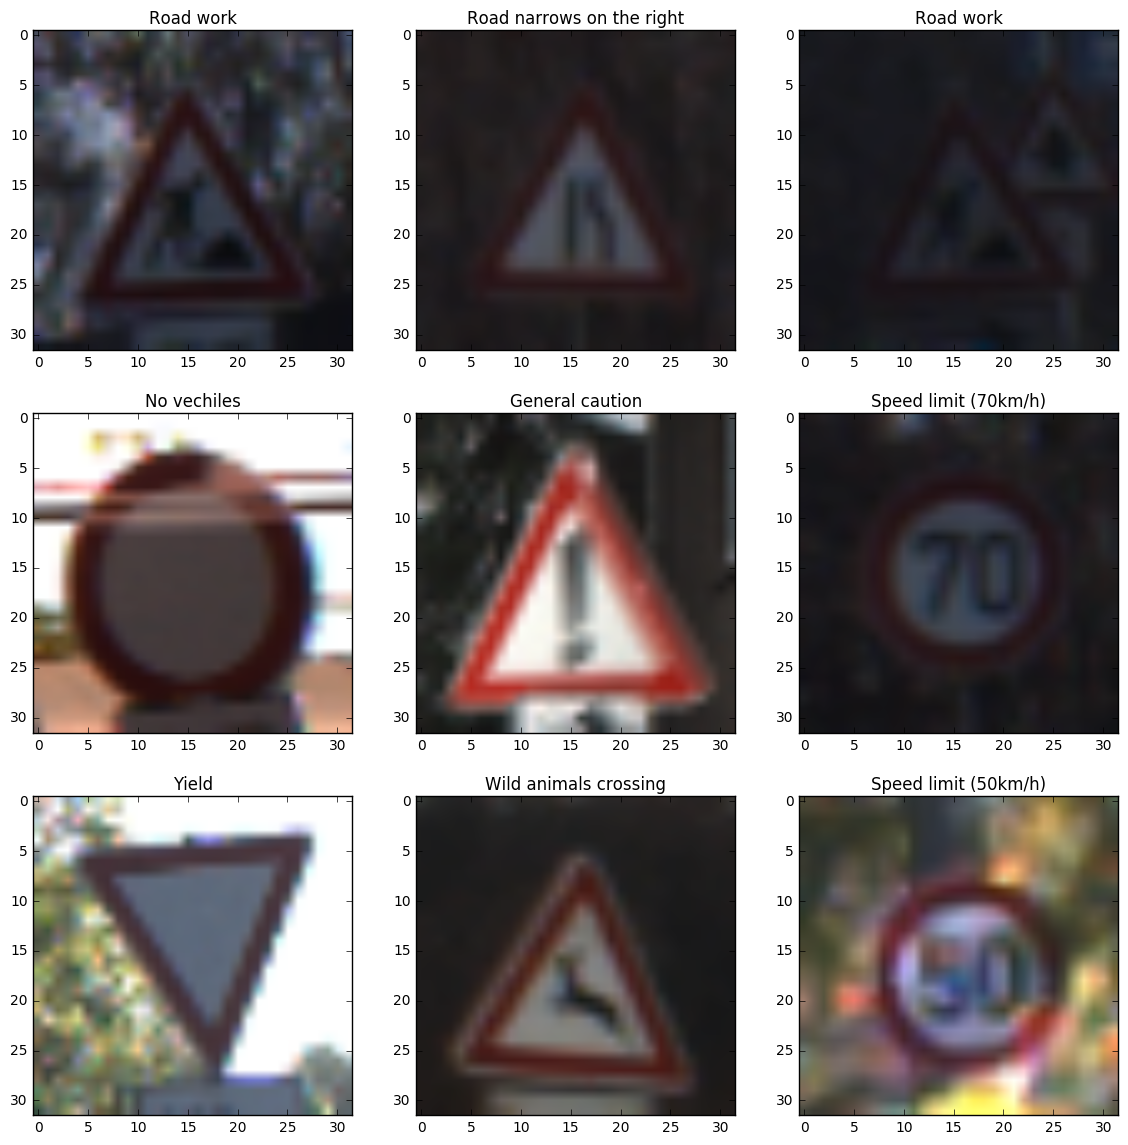

In [6]:
# Plot 9 random images from train set

plt.figure(figsize=(14, 14))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    img = np.random.randint(2, high=n_train)
    plt.imshow(X_train[img, :, :, :]) 
    plt.title(signnames.SignName.loc[y_train[img]])


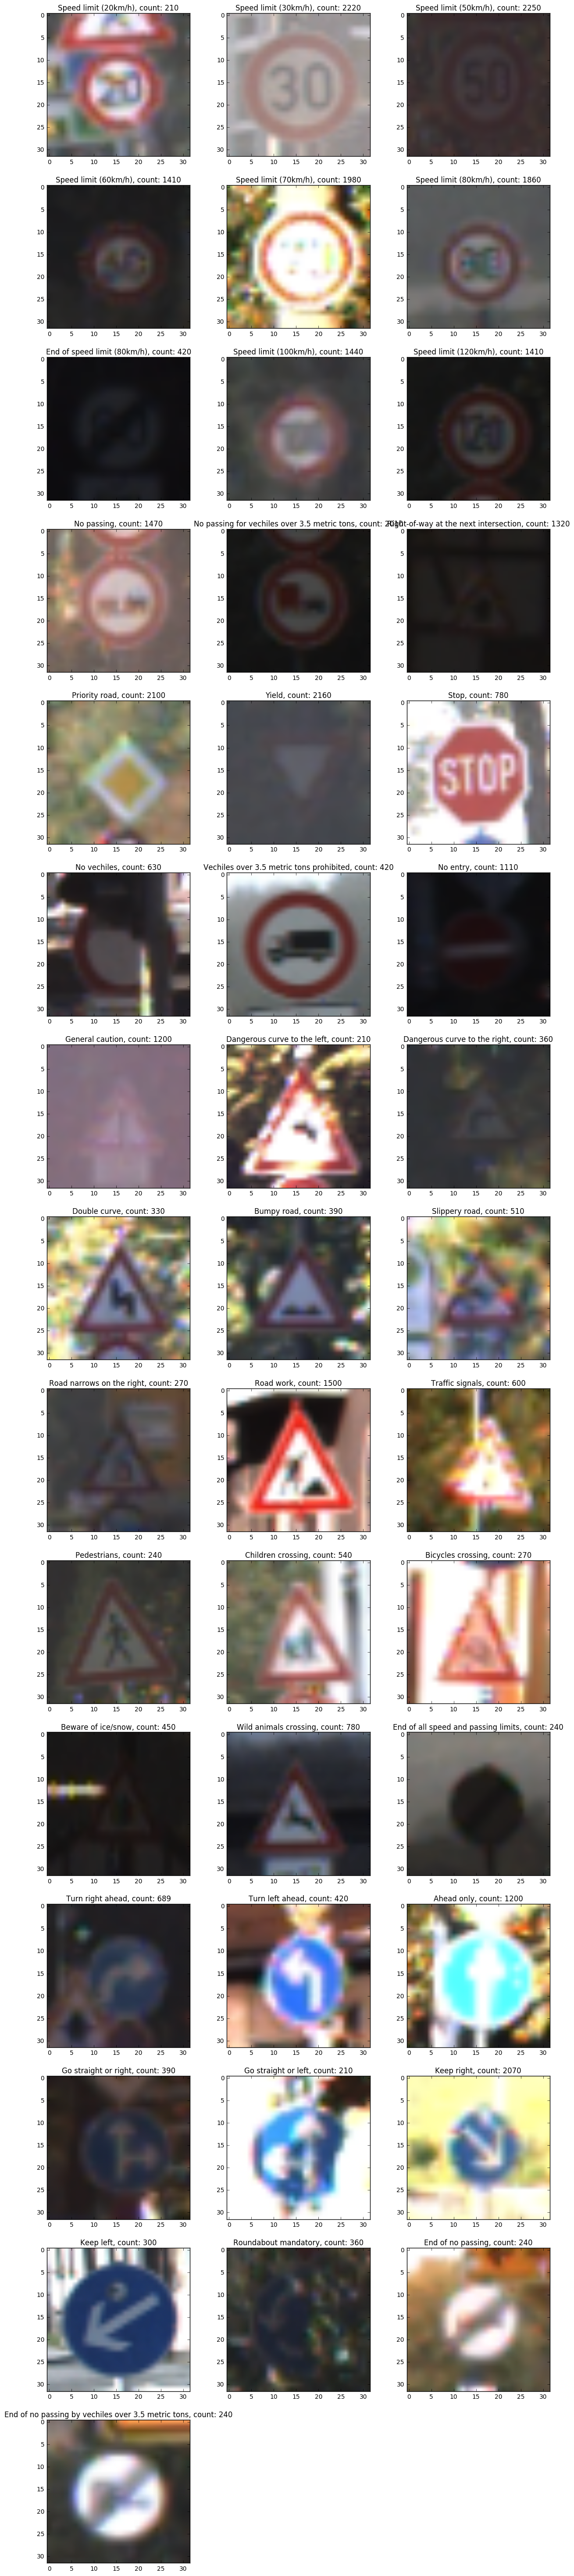

In [7]:
# Plot 1st image from each class
plt.figure(figsize=(15, 5*math.ceil(n_classes/3)))
n_freq = list(zip(*np.unique(y_train, return_counts=True)))

for i, n_ in enumerate(n_freq):
    n, freq = n_
    img = np.argmax(y_train == n)
    plt.subplot(math.ceil(n_classes/3), 3, i+1)
    plt.imshow(X_train[img,:,:,:]) 
    plt.title(signnames.SignName.loc[y_train[img]] + ", count: " + str(freq))


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

def normalize_zero_one(x):
    return x / 255 - 0.5

X_train = normalize_zero_one(X_train)
X_test = normalize_zero_one(X_test)


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

First I will try to normalise the data, by scaling the colour channels between zero and one.

In [9]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [10]:
train_set, cv_set, train_labels, cv_labels = train_test_split(X_train, y_train)


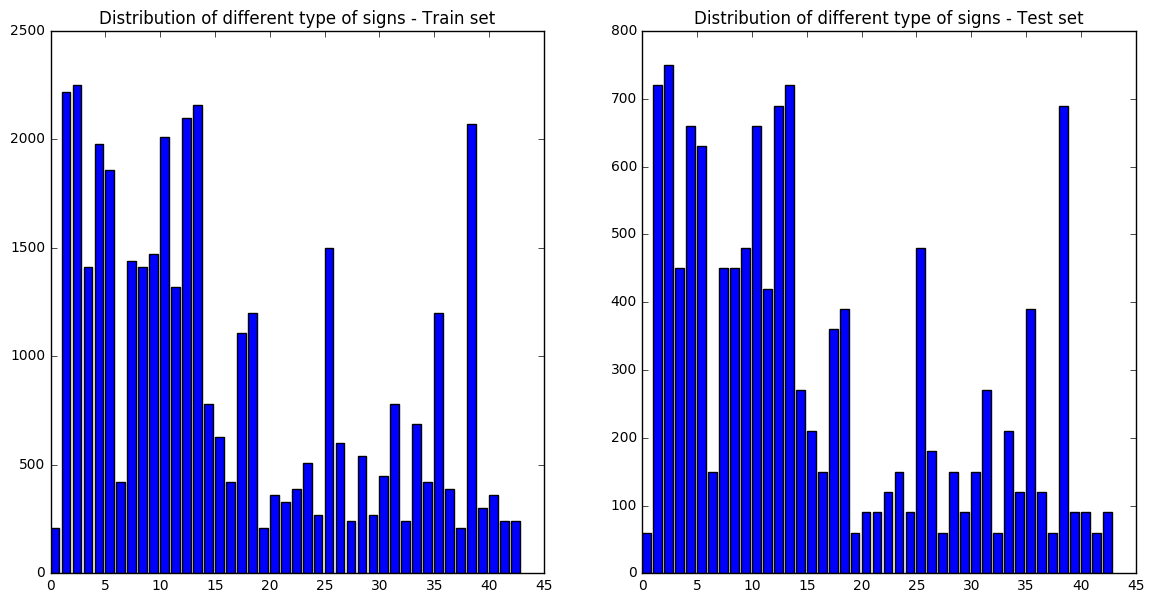

In [11]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
n_freq = np.unique(y_train, return_counts=True)
plt.bar(n_freq[0], n_freq[1])
plt.title("Distribution of different type of signs - Train set")
plt.subplot(1,2,2)
n_freq = np.unique(y_test, return_counts=True)
plt.bar(n_freq[0], n_freq[1])
plt.title("Distribution of different type of signs - Test set")

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

I leave the official test set as a test set and split the original train set into two - a new train set and a cross validation set. I keep the default ratio of 0.75 : 0.25
From the graphs above is obvious that the inbalances of the classes are similar in the train and test set, that's why for now I am not generating more data.

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

At 1500 > 1000 layers reached 100% accuracy on train set and 93.8% accuracy on cv - itteration 15000 for 128 batch size and 0.001 learning rate. Here I start regularizing. 
Add dropout(0.5) at input - low, low accuracy 3% - normalization - mean.

In [13]:
sess = None

In [ ]:
n_train = train_set.shape[0]
n_cv = cv_set.shape[0]

print("Number of training examples =", n_train)
print("Number of cv examples =", n_cv)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

n_input = image_shape[0] * image_shape[1] * image_shape[2]
n_hidden_layer_1 = 1500
n_hidden_layer_2 = 1000


# Store layers weight & bias
weights = {
    'hidden_layer1': tf.Variable(tf.random_normal([n_input, n_hidden_layer_1])),
    'hidden_layer2': tf.Variable(tf.random_normal([n_hidden_layer_1, n_hidden_layer_2])),

    'out': tf.Variable(tf.random_normal([n_hidden_layer_2, n_classes]))
}
biases = {
    'hidden_layer1': tf.Variable(tf.random_normal([n_hidden_layer_1])),
    'hidden_layer2': tf.Variable(tf.random_normal([n_hidden_layer_2])),

    'out': tf.Variable(tf.random_normal([n_classes]))
}

# tf Graph input
x = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

x_flat = tf.reshape(x, [-1, n_input])
x_flat = tf.nn.dropout(x_flat, keep_prob)


# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer1']), biases['hidden_layer1'])
layer_1 = tf.nn.relu(layer_1)

# Dropout
# layer_1 = tf.nn.dropout(layer_1, keep_prob)

layer_2 = tf.add(tf.matmul(layer_1, weights['hidden_layer2']), biases['hidden_layer2'])
layer_2 = tf.nn.relu(layer_2)

# Dropout
# layer_2 = tf.nn.dropout(layer_2, keep_prob)

# Output layer with linear activation
logits = tf.matmul(layer_2, weights['out']) + biases['out']

# Accuracy 
correct_prediction = tf.equal(tf.arg_max(logits, 1), tf.arg_max(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

if sess:
    sess.close()
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)


In [14]:
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder(n_values=n_classes)
encoder.fit(train_labels.reshape((-1,1)))

train_labels_one_hot = encoder.transform(train_labels.reshape((-1,1))).todense()
cv_labels_one_hot = encoder.transform(cv_labels.reshape((-1,1))).todense()

In [15]:
def batch(x, y, size=3, batches=3):
    for i in range(batches):
        idx = np.random.randint(0,x.shape[0], size)
        yield x[idx], y[idx]
        
            
# for i, b in enumerate(batch(train_set, train_labels_one_hot)):
#     x_batch, y_batch = b
#     print(x_batch.shape)
#     print(y_batch.shape)


In [ ]:
0 0.0234375 0.0313169
1000 0.8125 0.759665
2000 0.859375 0.822095
3000 0.90625 0.864327
4000 0.960938 0.873712
5000 0.921875 0.891156
6000 0.945312 0.903397
7000 1.0 0.915026
8000 0.984375 0.903295
9000 0.96875 0.903703
10000 0.992188 0.903703
11000 0.953125 0.903499
12000 0.96875 0.925431
13000 0.960938 0.931042
14000 0.992188 0.935224
15000 1.0 0.938488
16000 0.984375 0.929511
17000 0.960938 0.944813
18000 0.953125 0.920126
19000 0.976562 0.943895
20000 0.992188 0.935836


## Convolutional NN

In [16]:
# Following this tutorial: https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/02_Convolutional_Neural_Network.ipynb

def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

def new_conv_layer(input,              
                   num_input_channels, 
                   filter_size,        
                   num_filters,        
                   max_pool_stride=2, # Use 0 to skip max_pool
                   conv_stride=1):  

    shape = [filter_size, filter_size, num_input_channels, num_filters]
    weights = new_weights(shape=shape)
    biases = new_biases(length=num_filters)

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, conv_stride, conv_stride, 1],
                         padding='SAME')
    layer += biases

    if max_pool_stride > 0:
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, max_pool_stride, max_pool_stride, 1],
                               strides=[1, max_pool_stride, max_pool_stride, 1],
                               padding='SAME')

    layer = tf.nn.relu(layer)
    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.
    
    return layer, weights


def flatten_layer(layer):
    layer_shape = layer.get_shape()

    # layer_shape == [num_images, img_height, img_width, num_channels]
    num_features = layer_shape[1:4].num_elements()
    layer_flat = tf.reshape(layer, [-1, num_features])
    return layer_flat, num_features


def new_fc_layer(input,          
                 num_inputs,    
                 num_outputs,   
                 use_relu=True):

    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    layer = tf.matmul(input, weights) + biases

    if use_relu:
        layer = tf.nn.relu(layer)

    return layer


In [28]:
filter_size1 = 5          
num_filters1 = 16         
filter_size2 = 5          
num_filters2 = 36       
fc_size = 128    

n_train = train_set.shape[0]
n_cv = cv_set.shape[0]

print("Number of training examples =", n_train)
print("Number of cv examples =", n_cv)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


# tf Graph input
x = tf.placeholder(tf.float32, [None, 32, 32, 3], name='x_image')
y = tf.placeholder(tf.float32, [None, n_classes], name='y_true')
keep_prob = tf.placeholder(tf.float32)


layer_conv1, weights_conv1 = new_conv_layer(input=x,
                                            num_input_channels=3,
                                            filter_size=filter_size1,
                                            num_filters=num_filters1)
print('conv layer 1', layer_conv1.get_shape(), 'weights shape:', weights_conv1.get_shape())
layer_conv1 = tf.nn.dropout(layer_conv1, keep_prob)

layer_conv2, weights_conv2 = new_conv_layer(input=layer_conv1,
                                            num_input_channels=num_filters1,
                                            filter_size=filter_size2,
                                            num_filters=num_filters2)
print('conv layer 2', layer_conv2.get_shape(), 'weights shape:', weights_conv2.get_shape())
layer_conv2 = tf.nn.dropout(layer_conv2, keep_prob)


layer_flat, num_features = flatten_layer(layer_conv2)
print('layer_flat', layer_flat.get_shape(), 'num_features:', num_features)


layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)

print('layer_fc1', layer_fc1.get_shape())

logits = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=n_classes,
                         use_relu=False)
print('logits', logits.get_shape())

y_pred = tf.nn.softmax(logits)

# Accuracy 
correct_prediction = tf.equal(tf.arg_max(logits, 1), tf.arg_max(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)


if sess:
    sess.close()
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

Number of training examples = 29406
Number of cv examples = 9803
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
conv layer 1 (?, 16, 16, 16) weights shape: (5, 5, 3, 16)
conv layer 2 (?, 8, 8, 36) weights shape: (5, 5, 16, 36)
layer_flat (?, 2304) num_features: 2304
layer_fc1 (?, 128)
logits (?, 43)


In [39]:
for i, b in enumerate(batch(train_set, train_labels_one_hot, size=256, batches=1001)):
    x_batch, y_batch = b
    _, batch_acc, batch_cost = sess.run([optimizer, accuracy, cost ], 
                                    feed_dict={x: x_batch, y: y_batch, keep_prob: 0.8})
    if i % 100 == 0:
        cv_acc, cv_cost = sess.run([accuracy, cost], feed_dict={x: cv_set[:256,:], y: cv_labels_one_hot[:256,:], keep_prob: 1.0})
        print(i, "accuracy:", batch_acc, cv_acc, "cost:", batch_cost, cv_cost)

0 accuracy: 0.992188 0.996094 cost: 0.0463647 0.00774229
100 accuracy: 0.988281 1.0 cost: 0.0289397 0.00628544
200 accuracy: 0.988281 1.0 cost: 0.0385056 0.00872853
300 accuracy: 0.996094 1.0 cost: 0.00719522 0.00488715
400 accuracy: 1.0 0.996094 cost: 0.00536296 0.00894122
500 accuracy: 1.0 0.996094 cost: 0.00314336 0.00829012
600 accuracy: 1.0 1.0 cost: 0.00153731 0.00493486
700 accuracy: 0.996094 1.0 cost: 0.0148354 0.00690831
800 accuracy: 1.0 0.996094 cost: 0.00110405 0.00832466
900 accuracy: 0.996094 0.992188 cost: 0.010325 0.0138673
1000 accuracy: 0.996094 1.0 cost: 0.0110829 0.00728759


In [40]:
cv_acc, cv_cost = sess.run([accuracy, cost], feed_dict={x: cv_set, y: cv_labels_one_hot, keep_prob: 1.0})
print(i, "accuracy:", batch_acc, cv_acc, "cost:", batch_cost, cv_cost)

1000 accuracy: 0.996094 0.993267 cost: 0.0110829 0.0316904


In [ ]:
# no dropout:
0 accuracy: 0.015625 0.0241763 cost: 19291.8 17137.8
1000 accuracy: 0.796875 0.745588 cost: 275.525 489.308
2000 accuracy: 0.890625 0.827196 cost: 173.074 311.284
3000 accuracy: 0.921875 0.850556 cost: 65.481 261.992
4000 accuracy: 0.929688 0.878813 cost: 66.8335 198.663
5000 accuracy: 0.960938 0.89442 cost: 21.034 175.927
6000 accuracy: 0.945312 0.882995 cost: 18.4813 203.894
7000 accuracy: 0.914062 0.891258 cost: 61.8492 191.083
8000 accuracy: 0.953125 0.903601 cost: 32.2379 174.571
9000 accuracy: 0.984375 0.927063 cost: 14.4275 125.736
10000 accuracy: 0.960938 0.916046 cost: 34.4207 145.993
11000 accuracy: 0.992188 0.916454 cost: 1.96126 133.523
12000 accuracy: 0.976562 0.927777 cost: 32.4752 130.859
13000 accuracy: 0.984375 0.937876 cost: 15.2652 113.364
14000 accuracy: 0.976562 0.941753 cost: 25.3948 107.514
15000 accuracy: 0.992188 0.943793 cost: 1.24925 101.303
16000 accuracy: 0.976562 0.929307 cost: 8.563 128.648
17000 accuracy: 0.992188 0.939202 cost: 5.99585 120.153
18000 accuracy: 0.984375 0.940018 cost: 0.89362 109.291
19000 accuracy: 0.984375 0.930021 cost: 1.48128 134.176
20000 accuracy: 0.992188 0.951341 cost: 4.20262 91.0733
In [ ]:

    
    drpoout input_x 0.9
0 accuracy: 0.0703125 0.0247883 cost: 26374.5 19833.0
1000 accuracy: 0.757812 0.74314 cost: 225.324 507.833
2000 accuracy: 0.851562 0.830664 cost: 214.398 281.104
3000 accuracy: 0.921875 0.835765 cost: 73.9734 314.112
4000 accuracy: 0.945312 0.888503 cost: 69.3543 177.6
5000 accuracy: 0.9375 0.896358 cost: 84.3492 170.276
6000 accuracy: 0.945312 0.878405 cost: 23.1133 211.742
7000 accuracy: 0.953125 0.902887 cost: 34.8693 180.337
8000 accuracy: 0.953125 0.914414 cost: 31.0314 156.178
9000 accuracy: 0.960938 0.920535 cost: 14.6948 152.378
10000 accuracy: 0.96875 0.926043 cost: 15.2959 133.041
11000 accuracy: 0.984375 0.927471 cost: 10.5089 132.867
12000 accuracy: 1.0 0.920331 cost: 0.0 159.027
13000 accuracy: 0.960938 0.91574 cost: 36.4833 162.349
14000 accuracy: 0.992188 0.937978 cost: 36.6903 122.351
15000 accuracy: 0.96875 0.93145 cost: 45.7581 133.481
16000 accuracy: 0.992188 0.948689 cost: 3.9844 100.509
17000 accuracy: 0.96875 0.925533 cost: 23.0183 133.56
18000 accuracy: 0.992188 0.946445 cost: 5.31872 99.019
19000 accuracy: 0.992188 0.947465 cost: 10.7802 107.175
20000 accuracy: 1.0 0.938182 cost: 0.0 125.835
In [ ]:

    
CNN: ~3k itterations, 128 then 256 batch size accuracy: 1.0 0.987147 cost: 0.00232341 0.0624209
dropout 0.8:
4000 accuracy: 0.992188 0.989289 cost: 0.0369007 0.0515085
5000 accuracy: 1.0 0.989799 cost: 0.0172542 0.0469535
6000 accuracy: 0.992188 0.989901 cost: 0.0308556 0.0456895
6331 accuracy: 0.996094 0.992349 cost: 0.00970181 0.0378543
7300 accuracy: 0.996094 0.993267 cost: 0.0110829 0.0316904


In [42]:
sess.close()

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.